In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('all_currencies.csv', parse_dates=['Date'])

In [17]:
df.sample(10)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
447106,158,2017-03-16,RCN,0.000025,0.000025,0.000012,0.000024,68.0,NaN
586205,662,2017-01-22,XEM,0.003686,0.003751,0.003603,0.003696,47775.0,3.317660e+07
163354,1300,2016-12-31,DGC,0.007498,0.007639,0.007225,0.007611,191.0,2.578510e+05
424468,258,2017-09-30,PROUD,0.013973,0.019219,0.013973,0.019150,16.0,NaN
252056,177,2015-08-24,GRC,0.000900,0.000900,0.000763,0.000791,8.0,3.283790e+05
307235,584,2018-02-11,LBC,0.367505,0.367505,0.318317,0.336907,438326.0,5.426844e+07
555511,55,2018-06-25,VIPS,0.000308,0.000379,0.000305,0.000312,12270.0,NaN
171346,1631,2018-06-03,DOGE,0.003576,0.003750,0.003545,0.003690,19570200.0,4.101900e+08
265823,207,2016-03-13,HNC,0.002144,0.002158,0.001942,0.001946,47.0,1.242200e+04
90123,1528,2017-07-04,BTC,2561.000000,2631.590000,2559.350000,2601.640000,985516032.0,4.206794e+10


In [18]:
df.head(10)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
5,5,2015-11-17,$$$,0.000036,0.000044,0.000033,0.000034,194.0,NaN
6,6,2015-11-18,$$$,0.000037,0.000040,0.000033,0.000033,170.0,NaN
7,7,2015-11-19,$$$,0.000033,0.000157,0.000033,0.000068,356.0,NaN
8,8,2015-11-20,$$$,0.000069,0.000093,0.000062,0.000064,158.0,NaN
9,9,2015-11-21,$$$,0.000064,0.000098,0.000064,0.000065,108.0,NaN


In [19]:
df.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Symbol                object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [20]:
df.index= df['Date']

In [21]:
symbol_list = df['Symbol'].value_counts().index.tolist()

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

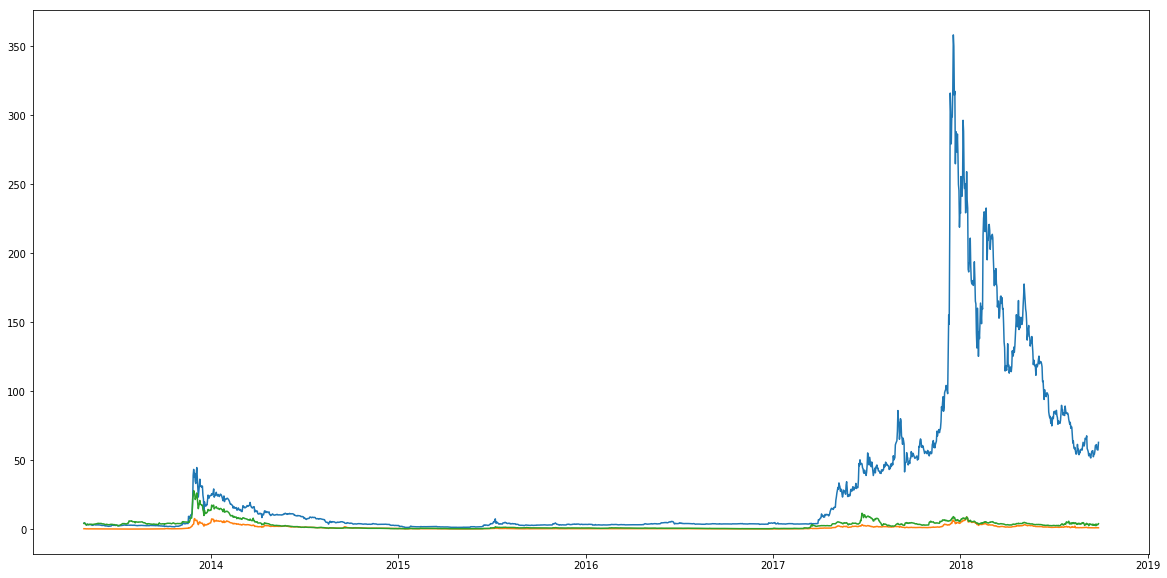

In [23]:
for symbol in symbol_list[2:5]:
    plt.plot(df.loc[df['Symbol'] == symbol,['Close']])

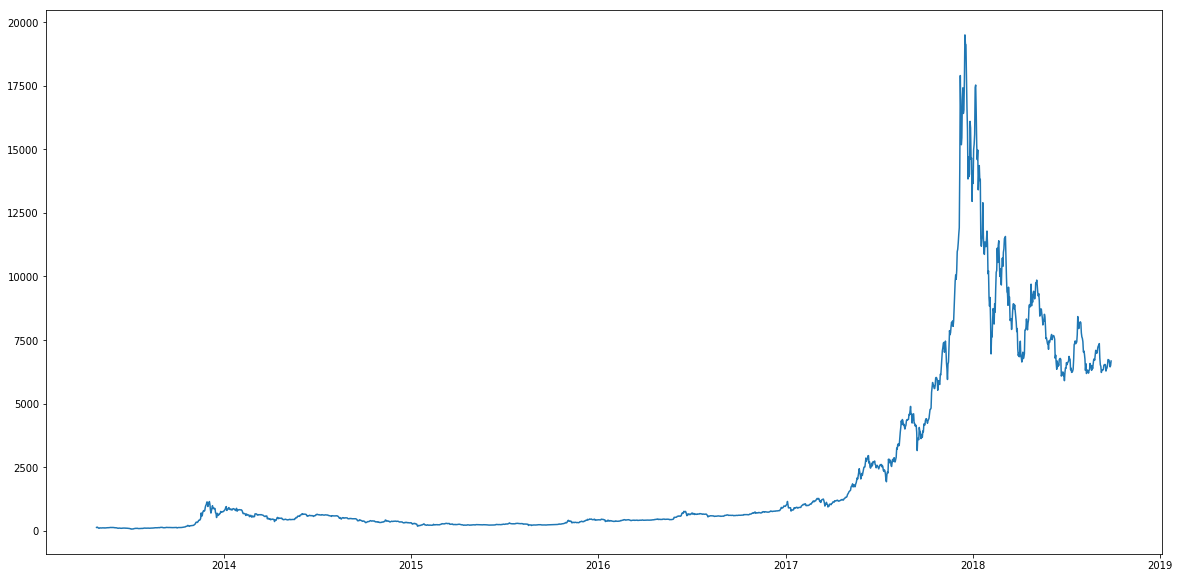

In [24]:
plt.plot(df.loc[df['Symbol'] == 'BTC',['Close']])

In [70]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1979, 1)

In [71]:
train = df_BTC[:'2018'].values
valid = df_BTC['2018':].values

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [73]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [75]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [76]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
1919/1919 [==============================] - 139s 73ms/step - loss: 0.0017
Epoch 2/2
1919/1919 [==============================] - 133s 69ms/step - loss: 9.1717e-04


In [77]:
inputs = df_BTC[len(df_BTC) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [78]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [79]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [80]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

951.4372709992498

C:\Users\Dikshant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


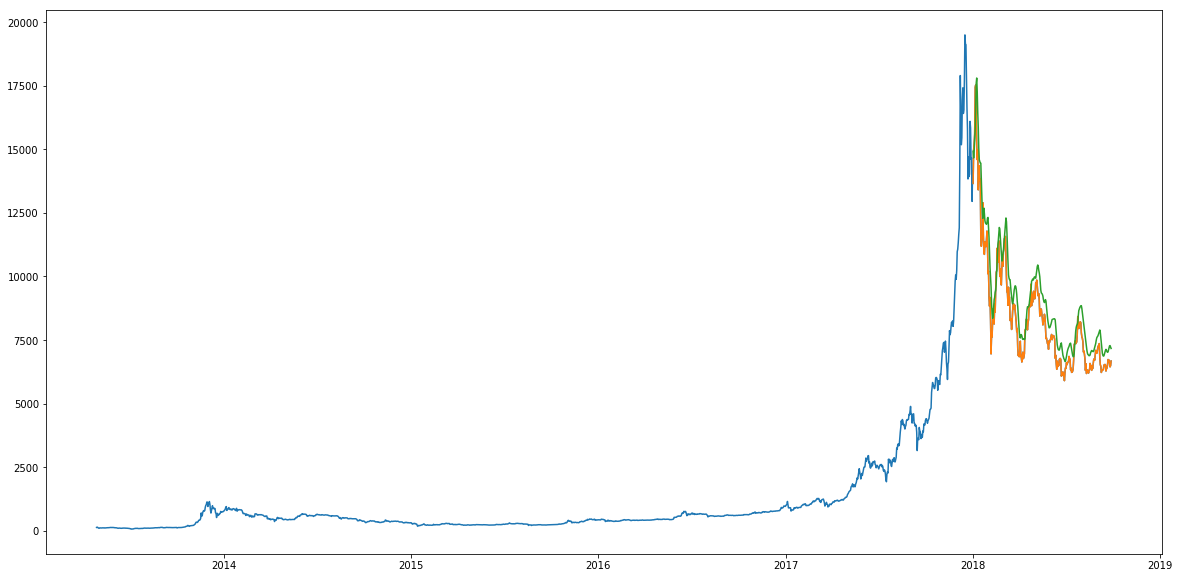

In [81]:
train = df_BTC[:'2018']
valid = df_BTC['2018':]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])